In [4]:
!apt install git

# Change to your working directory
%cd /content

# Clone the shared GitHub repository
!git clone https://github.com/Adamsomondi/BANK-CHURN-PREDICTION.git

# Move into the repo
%cd BANK-CHURN-PREDICTION

# Checks the contents of the repository
!ls -la

# Ensures you are in the correct repository
%cd /content/BANK-CHURN-PREDICTION

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/content
fatal: destination path 'BANK-CHURN-PREDICTION' already exists and is not an empty directory.
/content/BANK-CHURN-PREDICTION
total 604
drwxr-xr-x 4 root root   4096 Mar 28 07:02 .
drwxr-xr-x 1 root root   4096 Mar 28 07:01 ..
drwxr-xr-x 2 root root   4096 Mar 28 07:02 data
-rw-r--r-- 1 root root  35571 Mar 28 07:01 Data_Preprocessing.ipynb
-rw-r--r-- 1 root root 553807 Mar 28 07:01 Eda_Analysis.ipynb
drwxr-xr-x 8 root root   4096 Mar 28 07:01 .git
-rw-r--r-- 1 root root    144 Mar 28 07:03 .gitignore
-rw-r--r-- 1 root root   2801 Mar 28 07:01 README.md
/content/BANK-CHURN-PREDICTION


In [5]:
import pandas as pd

# Correct direct file link
file_id = "1-6FhvYRRgceTptrIMfgvaXkq-QKw8dwf"
file_url = f"https://drive.google.com/uc?id={file_id}"# Load the dataset
df = pd.read_csv(file_url)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [6]:
#Data preprocessing

#Identifying missing values
missing_values = df.isnull().sum()
print(missing_values)

# Encode Categorical Variables
# Check data types to identify categorical variables
print(df.dtypes)

# Example: One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

from sklearn.preprocessing import StandardScaler

# Example: Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Resolved Data Quality Issues
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

# Removed duplicate rows
df.drop_duplicates(inplace=True)

# Create a 'data' directory if it doesn't exist
import os
os.makedirs('data', exist_ok=True)

# Save Cleaned Data
cleaned_data_path = "data/cleaned_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")

# Create the .gitignore file
gitignore_path = ".gitignore"
ignore_entry = "data/cleaned_data.csv\n"
# Ensure the .gitignore file exists and contains the ignore entry
with open(gitignore_path, 'a') as f:
    f.write(ignore_entry)

print("Updated .gitignore to exclude data/cleaned_data.csv")


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object
I

In [7]:
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,...,False,False,False,False,False,False,False,False,False,False
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,...,False,False,False,False,False,True,False,False,False,False
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,...,False,False,False,False,False,False,False,False,False,False
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,...,False,False,False,False,False,False,False,True,False,False
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,...,False,False,False,False,False,False,True,False,False,False
9996,1.730838,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,...,False,False,False,False,False,False,True,False,True,False
9997,1.731185,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,...,False,False,False,False,False,False,False,False,False,True
9998,1.731531,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,...,False,False,False,False,True,False,True,True,False,False


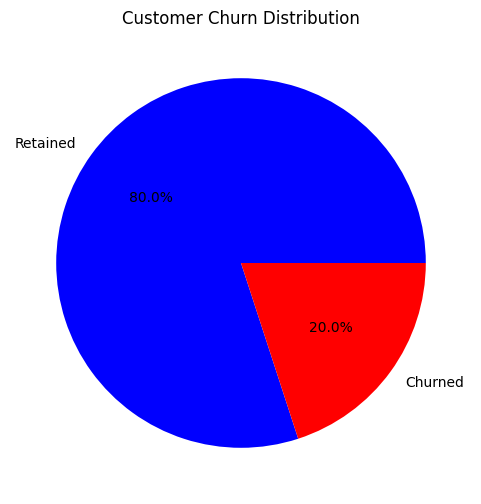

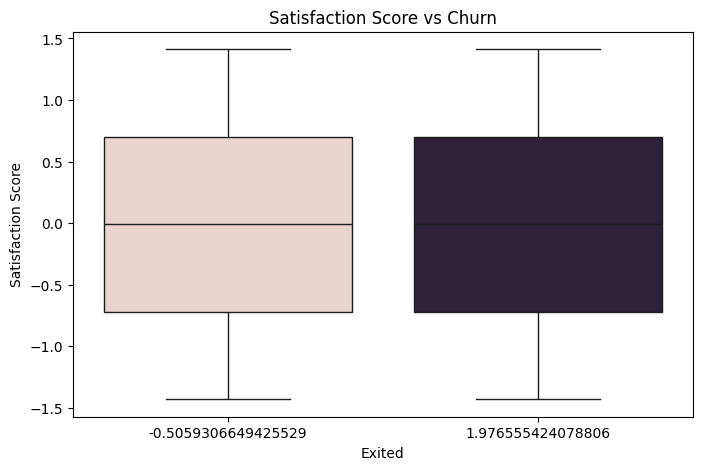

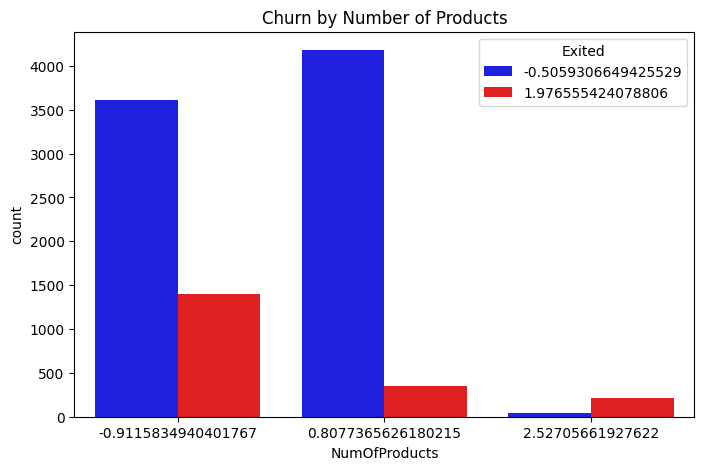

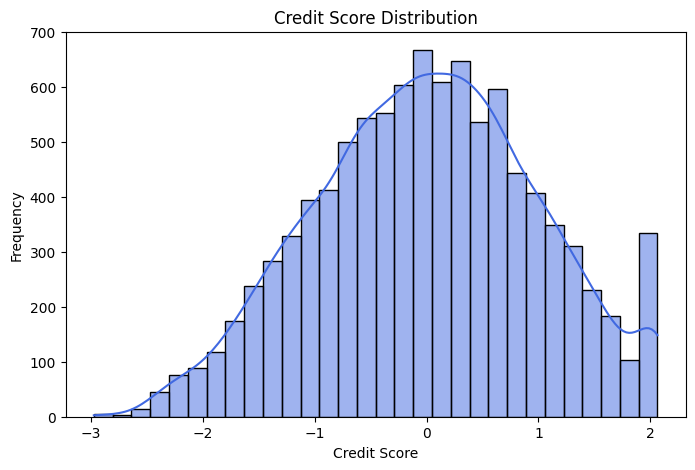

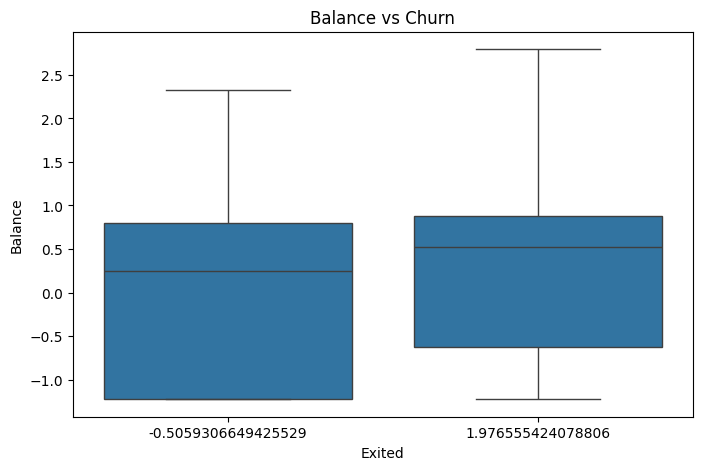

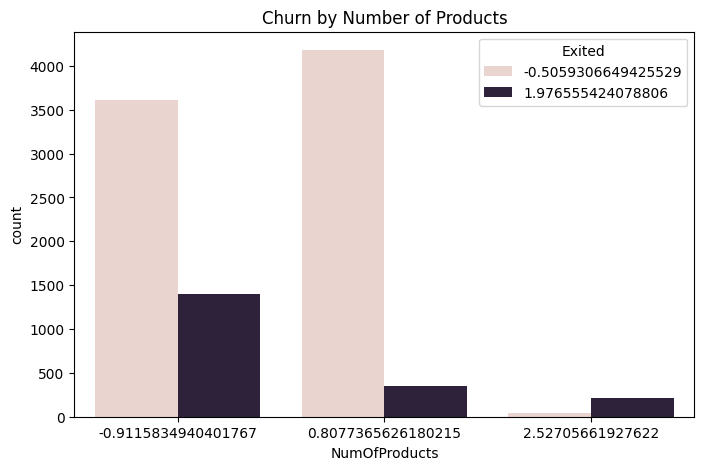

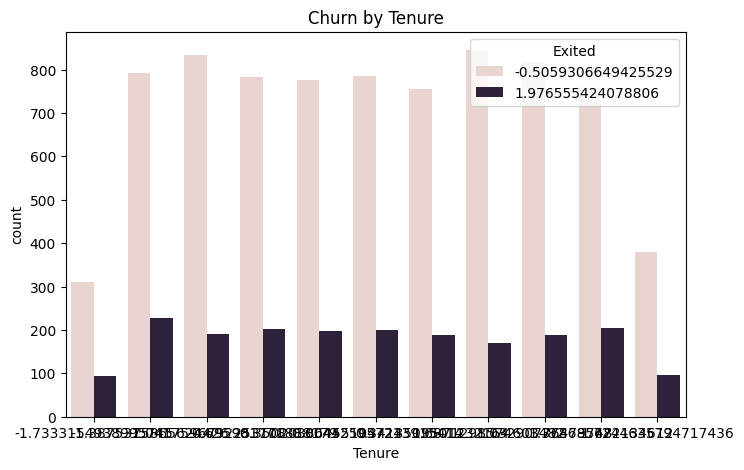

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
churn_counts = df["Exited"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Retained", "Churned"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Customer Satisfaction Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Satisfaction Score", data=df, hue="Exited", legend=False)
plt.title("Satisfaction Score vs Churn")
plt.show()

# Churn by Number of Products
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, palette=["blue", "red"])
plt.title("Churn by Number of Products")
plt.show()

# Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CreditScore"], bins=30, kde=True, color="royalblue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

# Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

# Number of Products vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="Tenure", hue="Exited", data=df)
plt.title("Churn by Tenure")
plt.show()

In [9]:
#Replace you-branch-name with what you are working on i.e edaanalysis,datacleaning, etc..
!git checkout -b data-modelling -q #meaning quite mode

In [10]:
#Data Modelling
#Preparing the data for modelling
from sklearn.model_selection import train_test_split
import pandas as pd

# Correct direct file link
file_id = "1-6FhvYRRgceTptrIMfgvaXkq-QKw8dwf"
file_url = f"https://drive.google.com/uc?id={file_id}"# Load the dataset
df = pd.read_csv(file_url)

# Assuming 'Exited' is the target variable (Churn) and you want to use the one-hot encoded DataFrame
# If 'Churn' is a separate column, replace 'Exited' with 'Churn'
X = df.drop("Exited", axis=1)
y = df["Exited"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data splitting done: ")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data splitting done: 
Training set shape: (7000, 17)
Testing set shape: (3000, 17)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# 'Exited' is your target variable (churn)
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Identifying categorical features (e.g., columns containing strings)
categorical_features = X.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(X[categorical_features])

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Initialization
models = [
    LogisticRegression(),
    RandomForestClassifier()
]

# Training the model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Make predictions on the test set

# Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 20)

# From here one can choose the best model based on the evaluation metrics


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: LogisticRegression
Accuracy: 0.8053
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
--------------------
Model: RandomForestClassifier
Accuracy: 0.9987
Precision: 0.9949
Recall: 0.9983
F1-score: 0.9966
--------------------


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

# ... (Data loading, preprocessing, and splitting as before) ...

# Define a list of classification models and their hyperparameter grids
# (Excluding DecisionTreeClassifier)
models = {
    LogisticRegression(): {'C': [0.1, 1, 10]},  # Tuning regularization strength
    RandomForestClassifier(): {'n_estimators': [100, 200], 'max_depth': [5, 10]}  # Tuning trees and depth
}

# Train and evaluate each model with hyperparameter tuning
for model, param_grid in models.items():
    print(f"Training {model.__class__.__name__} with hyperparameter tuning...")

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

    # Perform the search
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 20)

Training LogisticRegression with hyperparameter tuning...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.1}
Accuracy: 0.8053
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
--------------------
Training RandomForestClassifier with hyperparameter tuning...
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.8097
Precision: 1.0000
Recall: 0.0223
F1-score: 0.0436
--------------------


In [13]:
# Train a Logistic Regression model and evaluate its performance

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training set
log_reg.fit(X_train, y_train)
print("Model training completed.")

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Display a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model training completed.
Accuracy Score: 0.79

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2416
           1       0.32      0.07      0.12       584

    accuracy                           0.79      3000
   macro avg       0.57      0.52      0.50      3000
weighted avg       0.72      0.79      0.73      3000



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls -la "/content/drive/My Drive/Colab Notebooks"
!find "/content/drive/My Drive" -name "Modelling.ipynb" #replace "Data_Preprocessing.ipynb" with the name of your file i.e edaanalysis.ipynb

!cp "/content/drive/My Drive/Colab Notebooks/Modelling.ipynb" /content/BANK-CHURN-PREDICTION/ #replace Data_Preprocessing.ipynb with the name of your file

!ls -la "/content/BANK-CHURN-PREDICTION/"

In [ ]:
!ls -la "/content/BANK-CHURN-PREDICTION/"

total 608
drwxr-xr-x 4 root root   4096 Mar 27 20:35 .
drwxr-xr-x 1 root root   4096 Mar 27 21:20 ..
drwxr-xr-x 2 root root   4096 Mar 27 20:35 data
-rw-r--r-- 1 root root  28863 Mar 27 20:35 Data_Preprocessing.ipynb
-rw-r--r-- 1 root root 560780 Mar 27 20:35 Eda_Analysis.ipynb
drwxr-xr-x 8 root root   4096 Mar 27 21:48 .git
-rw-r--r-- 1 root root    137 Mar 27 21:45 .gitignore
-rw-r--r-- 1 root root   6326 Mar 27 20:35 README.md


In [ ]:
# Git commands to push the changes adding your changes
!git config --global user.name "Ndanu-eng" #replace your own github name.
!git config --global user.email "ndanulorna7@gmail.com" #replace your own github gmail.
!git add .

 # Commit your changes
!git commit -m "Finished data modelling" #write a message "finished data Cleaning/added eda analysis"

[data-modelling c1d3d27] Finished data modelling
 1 file changed, 1 insertion(+)


In [ ]:
#!git remote set-url origin https://<TOKEN>@github.com/Adamsomondi/BANK-CHURN-PREDICTION.git  #replace <TOKEN> with PAT keys you created.
!git remote set-url origin https://ndanutoken@github.com/Adamsomondi/BANK-CHURN-PREDICTION.git #replace the token with what you copied


In [ ]:
!git push origin data-modelling # Replace with your actual branch name you created earlier